C:\Users\com\OneDrive\Lecture\fall_2017\Google Practicum\Data\Week7


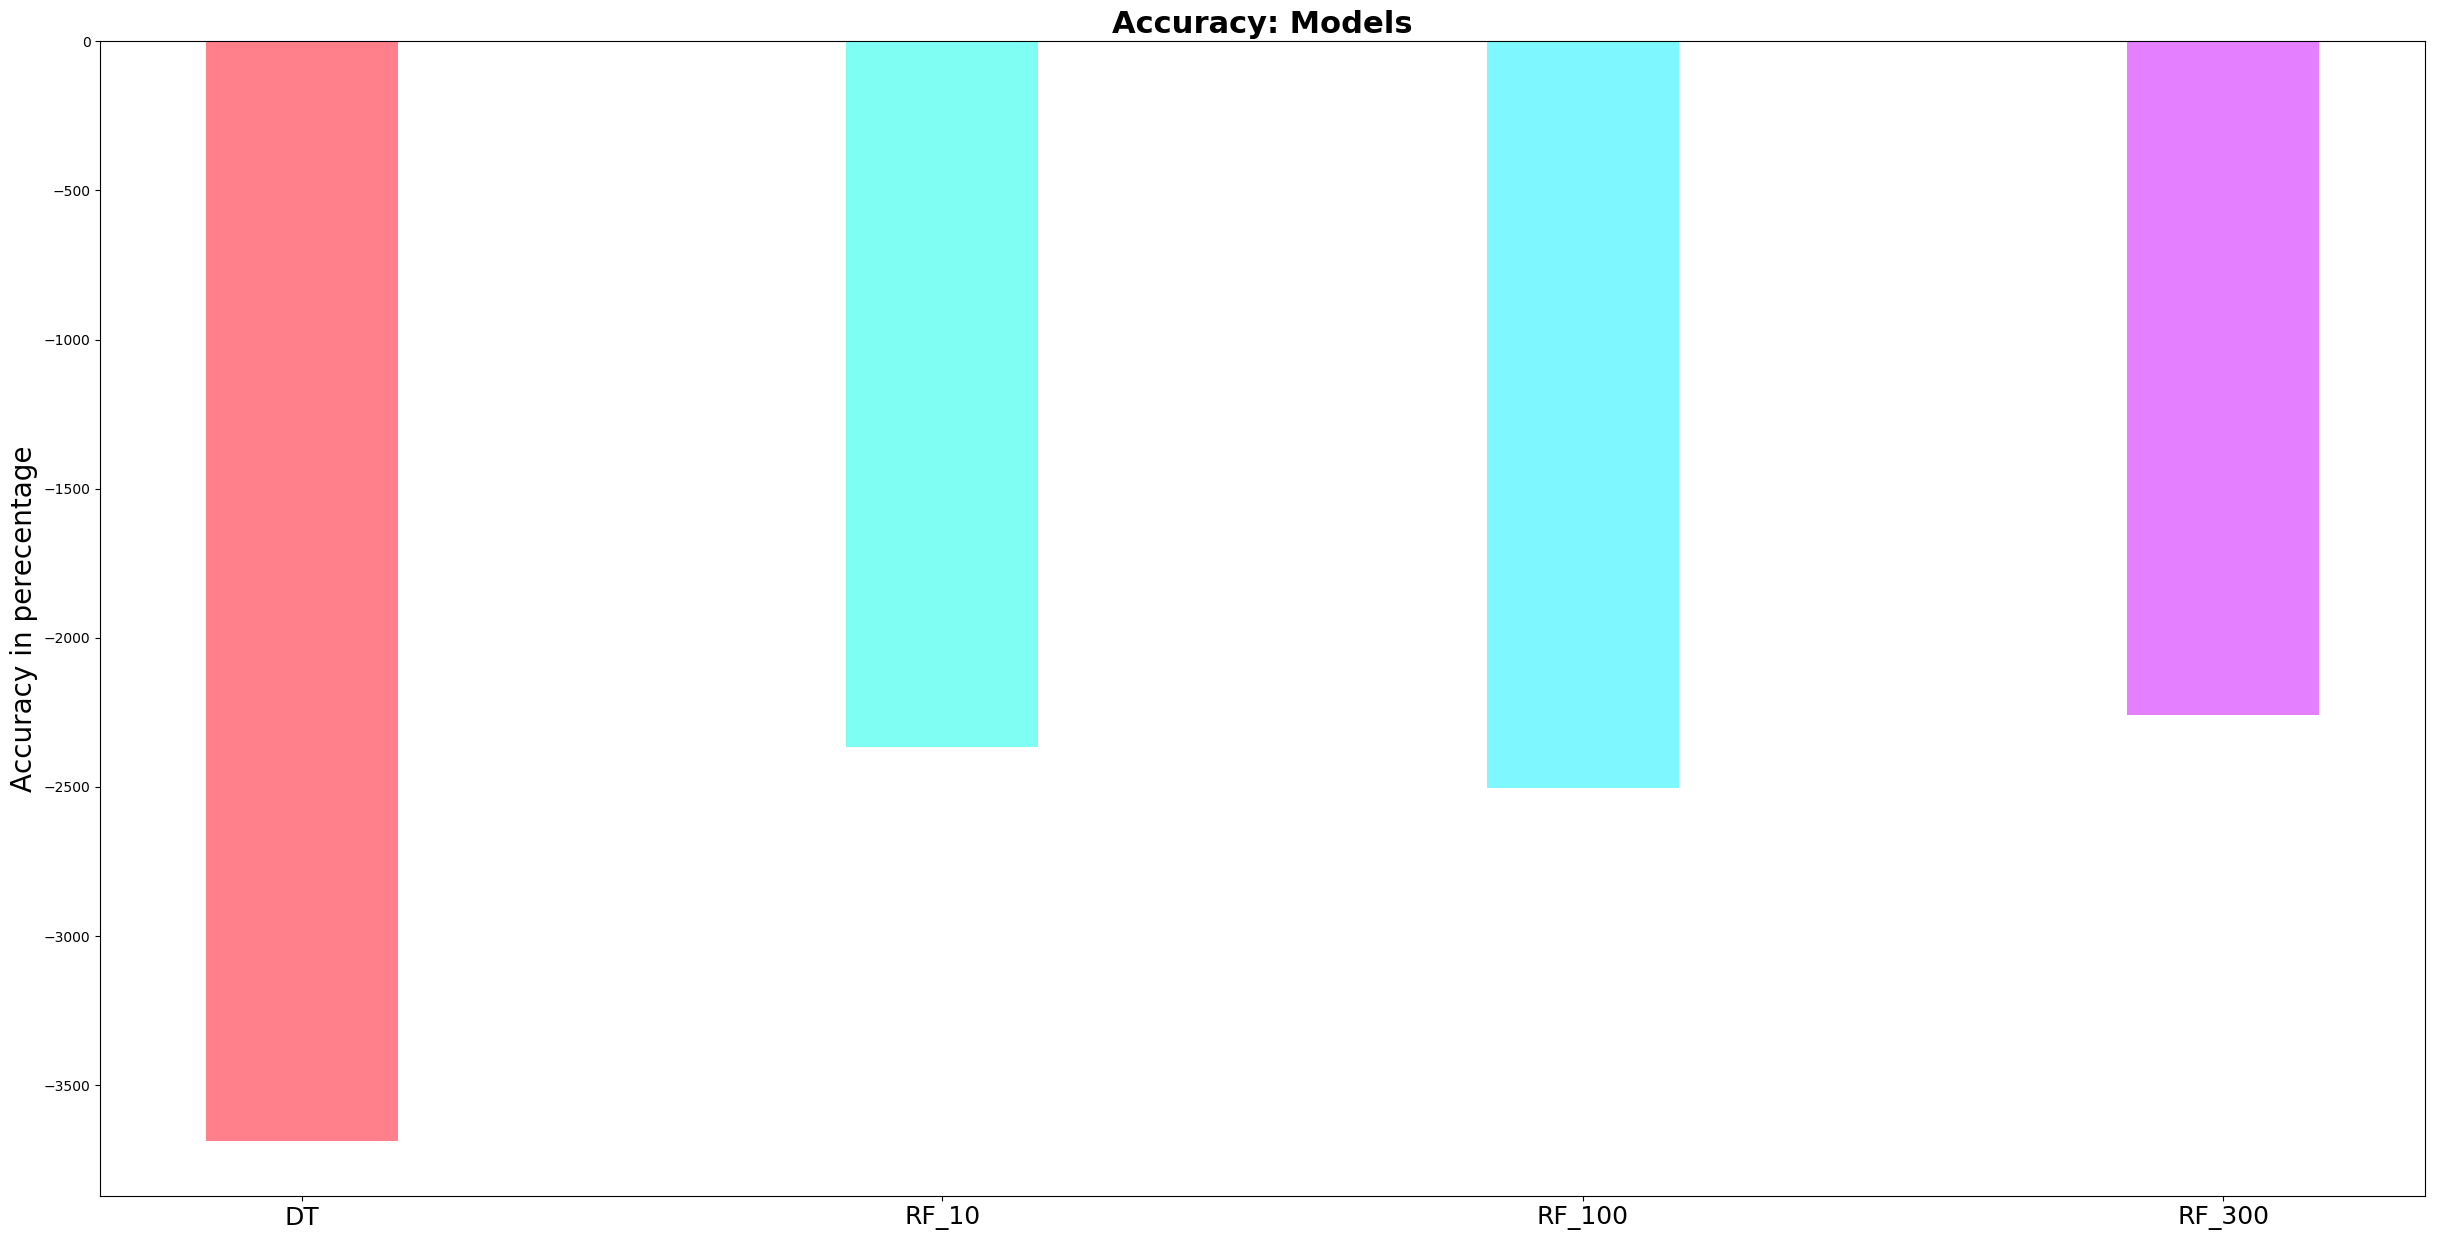

In [8]:
# Library Import
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import Imputer

# import the train test split
from sklearn.model_selection import train_test_split

# Get current working directory
cwd = os.getcwd()
print(cwd)


df_oct_updated = pd.read_csv('annual_weather_input.csv')
df_oct_updated.head()

price_updated = pd.read_csv('annual_price_input.csv')

price = price_updated['OCT_discount']
input_variables = df_oct_updated.iloc[:,67:-44]

# List of column names

#List to store results
# Stores the performance on test set.
model_results = []
#  Stores the name of model
model_name = []

# Making all column names UPPER CASE --> inline with the weather data file
df_oct_updated.columns = map(str.upper, df_oct_updated.columns)

df_oct_updated.head()

col_names = list(df_oct_updated)

#input_variables[input_variables <= 0] = np.nan
#input_variables_2 = input_variables.drop(input_variables.columns[input_variables.apply(lambda col: col.isnull().sum() >= 1)], axis=1)
#input_variables

# Fitting Decision Tree Regression to the dataset

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Fitting Random Forest Regression to the dataset
from sklearn.model_selection import cross_val_score
model_name = ["DT", "RF_10", "RF_100", "RF_300"]

regressor = DecisionTreeRegressor(random_state = 0)
accuracies = cross_val_score(estimator = regressor, X = input_variables, y = price, cv = 10)
model_results.append(accuracies.mean())


regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
accuracies = cross_val_score(estimator = regressor, X = input_variables, y = price, cv = 10)
model_results.append(accuracies.mean())

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
accuracies = cross_val_score(estimator = regressor, X = input_variables, y = price, cv = 10)
model_results.append(accuracies.mean())

regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
accuracies = cross_val_score(estimator = regressor, X = input_variables, y = price, cv = 10)
model_results.append(accuracies.mean())

from matplotlib import cm
import random
model_name = ["DT", "RF_10", "RF_100", "RF_300"]
# Give each bar separate color
color_code_vector = random.sample(range(1, 100), len(model_name))
reg_color_code_vector = map(lambda x: x/max(color_code_vector), color_code_vector)
reg_color_code_vector = list(reg_color_code_vector)
reg_color_code_vector
colors = cm.hsv(reg_color_code_vector)

# Expressing accuracy in percentage
model_results_percentage = list(map(lambda x: x*100, model_results))

y_pos = np.arange(len(model_name))

plt.rcdefaults() # white background, gets rid of gray
plt.figure(figsize = (30,15))
plt.bar(y_pos, model_results_percentage, align='center', alpha=0.5, width=0.3, color = colors)
plt.xticks(y_pos, model_name, fontsize = 18)
plt.ylabel('Accuracy in perecentage', fontsize=20)
plt.title('Accuracy: Models', fontsize=22, fontweight='bold')
plt.show()


In [5]:
model_results_percentage

[-3688.4383003007465,
 -3688.4383003007465,
 -2367.7283917794007,
 -2505.1298553369179,
 -2505.1298553369179,
 -2257.9584100973752,
 -2257.9584100973752]

In [6]:
model_results

[-36.884383003007464,
 -36.884383003007464,
 -23.677283917794007,
 -25.051298553369179,
 -25.051298553369179,
 -22.579584100973751,
 -22.579584100973751]